              Barcodes CellType  ALT  VAF           SNV
0     AAACCCATCGAGATAA       NC    0  0.0  chrM:13635:C
1     AAACGCTAGGAGGTTC        C    0  0.0  chrM:13635:C
2     AAAGGATCAATTGCCA       NC    0  0.0  chrM:13635:C
3     AAAGGGCAGGACTATA        C    3  0.6  chrM:13635:C
4     AAAGGTATCCCATACC       NC    0  0.0  chrM:13635:C
...                ...      ...  ...  ...           ...
2947  AATAGGATGCGTATTG      EDT    1  1.0  chrM:16065:A
2948  CTATGGCCTACTGAGG      EDT    1  1.0  chrM:16065:A
2949  TATCAGCGACGTGGAA      EDT    2  1.0  chrM:16065:A
2950  ATCACAGACGTAATGA      EDT    0  0.0  chrM:16065:A
2951  CGATCTCACTACCTAG      EDT    0  0.0  chrM:16065:A

[30949 rows x 5 columns]
[3467, 20568, 2568, 299, 566, 3663]
[119, 1084, 297, 10, 10, 64]
chrM:2815:A
chrM:3092:C
chrM:5179:C
chrM:13635:C
chrM:16192:T
chrM:2573:A
slope:  0.7524403199462228
r-squared:  0.8691967883228555
intercept: 1.9141894846257461


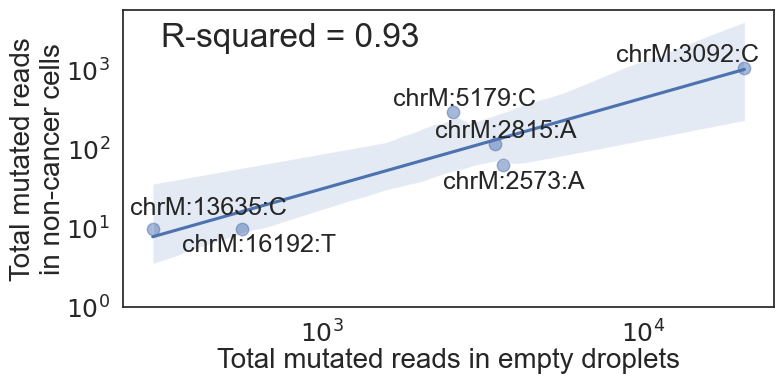

In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

sns.set_theme(style="white",font_scale=1)

fig, ax = plt.subplots(figsize=(8, 4))
muts =['chrM:2815:A','chrM:3092:C','chrM:5179:C','chrM:13635:C','chrM:16192:T', 'chrM:2573:A']
df = pd.read_csv('c:/Users/arthu/These/Documents/Projects/long_reads_tree/REVISIONS/MitoConta/P1.scRNA_VAF.tsv',sep='\t')
df1 = pd.read_csv('c:/Users/arthu/These/Documents/Projects/long_reads_tree/REVISIONS/MitoConta/P1.scRNA_VAF.emptydrops.tsv',sep='\t')
df2= pd.read_csv('c:/Users/arthu/These/Documents/Projects/long_reads_tree/REVISIONS/MitoConta/P2.scRNA_VAF.tsv',sep='\t')
df3 = pd.read_csv('c:/Users/arthu/These/Documents/Projects/long_reads_tree/REVISIONS/MitoConta/P2.scRNA_VAF.emptydrops.tsv',sep='\t')
df = pd.concat([df,df1,df2,df3])

df['CellType'] = df['CellType'].map({'Cancer':'C',
                                     'NonCancer':'NC',
                                     'Normal':'N',
                                     "Empty droplets\r\n Tumor":'EDT',
                                     "Empty droplets\r\n Normal":'EDN'})
sums_nc = []
sums_c = []

for mut in muts:
    df1 = df[df['SNV']==mut]
    sums_c.append(np.sum(list(df1[df1['CellType']=='EDT']['ALT'])))
    sums_nc.append(np.sum(list(df1[df1['CellType']=='NC']['ALT'])))

data = pd.DataFrame({'Cancer':sums_c, 'NonCancer':sums_nc})
#data = duplicates[['NonCancer', 'Cancer']].dropna(thresh=2)
sns.regplot(x=np.log10(data['Cancer']), y=np.log10(data['NonCancer']),
            scatter_kws={'s': 80, 'alpha': 0.5}, ax=ax)
ax.set_ylabel('Total mutated reads\nin non-cancer cells', labelpad=0, fontsize=20)
ax.set_xlabel('Total mutated reads in empty droplets', labelpad=0, fontsize=20)
ax.set_title('', pad=30, size=20)

for i in range(6):
    print(muts[i])
    if muts[i] == 'chrM:3092:C':
        ax.text(np.log10(0.4*sums_c[i]),np.log10(1.2*sums_nc[i]),muts[i],size=18)
    elif muts[i] == 'chrM:13635:C':
        ax.text(np.log10(0.85*sums_c[i]),np.log10(1.5*sums_nc[i]),muts[i],size=18)
    elif muts[i] == 'chrM:16192:T':
        ax.text(np.log10(0.65*sums_c[i]),np.log10(0.5*sums_nc[i]),muts[i],size=18)
    elif muts[i] == 'chrM:2573:A':
        ax.text(np.log10(0.65*sums_c[i]),np.log10(0.5*sums_nc[i]),muts[i],size=18)
    else:
        ax.text(np.log10(0.65*sums_c[i]),np.log10(1.2*sums_nc[i]),muts[i],size=18)

#ticks = np.log10(np.array([1, 2, 5, 10, 20]))
ax.set_xticks(np.log10([1000, 10000]))
ax.set_xticklabels(['$10^3$','$10^4$'])
#ax.set_xticks(np.log10([1, 10, 100,1000]))
#ax.set_xticklabels(['$10^0$','$10^1$','$10^2$','$10^3$'])
ax.set_yticks(np.log10([1, 10, 100,1000]))
ax.set_yticklabels(['$10^0$','$10^1$','$10^2$','$10^3$'])
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)

xline=data['NonCancer']
yline = data['Cancer']

#z=np.arange(1, len(yline)+1) #start at 1, to avoid error from log(0)

rank = [np.log10(i) for i in xline]
freq = [np.log10(i) for i in yline]
m, b, r_value, p_value, std_err = stats.linregress(rank, freq)

abline_values = [m * i + b for i in rank]


ax.text(2.5,3.3, 'R-squared = {0:.2f}'.format(r_value), size = 24)

plt.tight_layout()
plt.savefig('c:/Users/arthu/These/Documents//Projects/long_reads_tree/REVISIONS/MitoConta/correlation_regress_emptydrops.png',
           dpi=600)





[35886, 34236, 15111, 4453, 928, 6603]
[119, 1084, 297, 10, 10, 64]
chrM:2815:A
chrM:3092:C
chrM:5179:C
chrM:13635:C
chrM:16192:T
chrM:2573:A
slope:  0.6314445214959066
r-squared:  0.7125521537552233
intercept: 2.7521329781135355


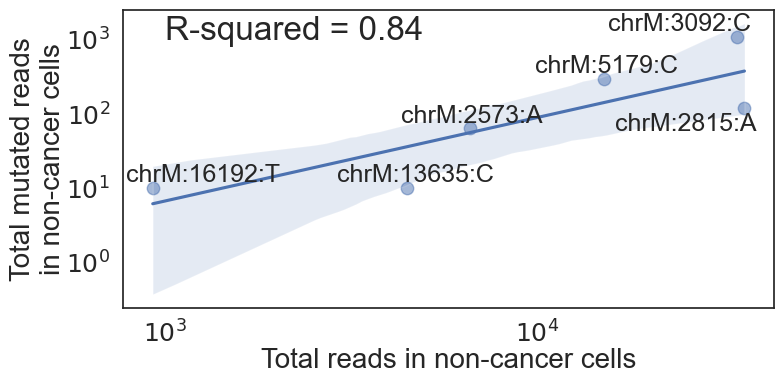

In [171]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

sns.set_theme(style="white",font_scale=1)

fig, ax = plt.subplots(figsize=(8, 4))
muts =['chrM:2815:A','chrM:3092:C','chrM:5179:C','chrM:13635:C','chrM:16192:T','chrM:2573:A']
df = pd.read_csv('c:/Users/arthu/These/Documents/Projects/long_reads_tree/REVISIONS/MitoConta/P1.scRNA_VAF.DP.tsv',sep='\t')
df1 = pd.read_csv('c:/Users/arthu/These/Documents/Projects/long_reads_tree/REVISIONS/MitoConta/P2.scRNA_VAF.DP.tsv',sep='\t')

df = pd.concat([df,df1])

df['CellType'] = df['CellType'].map({'Cancer':'C',
                                     'NonCancer':'NC',
                                     'Normal':'N',
                                     "Empty droplets\r\n Tumor":'EDT',
                                     "Empty droplets\r\n Normal":'EDN'})


sums_nc = []
sums_c = []

for mut in muts:
    df1 = df[df['SNV']==mut]
    sums_c.append(np.sum(list(df1[df1['CellType']=='NC']['DP'])))
    sums_nc.append(np.sum(list(df1[df1['CellType']=='NC']['ALT'])))

print(sums_c)
print(sums_nc)
data = pd.DataFrame({'Cancer':sums_c, 'NonCancer':sums_nc})
#data = duplicates[['NonCancer', 'Cancer']].dropna(thresh=2)
sns.regplot(x=np.log10(data['Cancer']), y=np.log10(data['NonCancer']),
            scatter_kws={'s': 80, 'alpha': 0.5}, ax=ax)
ax.set_ylabel('Total mutated reads\nin non-cancer cells', labelpad=0, fontsize=20)
ax.set_xlabel('Total reads in non-cancer cells', labelpad=0, fontsize=20)
ax.set_title('', pad=30, size=20)

for i in range(6):
    print(muts[i])
    if muts[i] == 'chrM:3092:C':
        ax.text(np.log10(0.45*sums_c[i]),np.log10(1.2*sums_nc[i]),muts[i],size=18)
    elif muts[i] == 'chrM:2815:A':
        ax.text(np.log10(0.45*sums_c[i]),np.log10(0.5*sums_nc[i]),muts[i],size=18)
    elif muts[i] == 'chrM:16192:T':
        ax.text(np.log10(0.85*sums_c[i]),np.log10(1.2*sums_nc[i]),muts[i],size=18)
    else:
        ax.text(np.log10(0.65*sums_c[i]),np.log10(1.2*sums_nc[i]),muts[i],size=18)

#ticks = np.log10(np.array([1, 2, 5, 10, 20]))
ax.set_xticks(np.log10([1000, 10000]))
ax.set_xticklabels(['$10^3$','$10^4$'])
#ax.set_xticks(np.log10([1, 10, 100,1000]))
#ax.set_xticklabels(['$10^0$','$10^1$','$10^2$','$10^3$'])
ax.set_yticks(np.log10([1, 10, 100,1000]))
ax.set_yticklabels(['$10^0$','$10^1$','$10^2$','$10^3$'])
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)

xline=data['NonCancer']
yline = data['Cancer']

#z=np.arange(1, len(yline)+1) #start at 1, to avoid error from log(0)

rank = [np.log10(i) for i in xline]
freq = [np.log10(i) for i in yline]
m, b, r_value, p_value, std_err = stats.linregress(rank, freq)
print("slope: ", m)
print("r-squared: ", r_value**2)
print("intercept:", b)
#plt.plot(rank, freq, 'o',color = 'r')
abline_values = [m * i + b for i in rank]
#plt.plot(rank, abline_values)

ax.text(3,3, 'R-squared = {0:.2f}'.format(r_value), size = 24)

plt.tight_layout()
plt.savefig('c:/Users/arthu/These/Documents//Projects/long_reads_tree/REVISIONS/MitoConta/correlation_regress_DP.png',
           dpi=600)





C:\Users\arthu\AppData\Local\Temp\ipykernel_4432\1519212539.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=x, y=y, palette=palette,
C:\Users\arthu\AppData\Local\Temp\ipykernel_4432\1519212539.py:36: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x=x, y=y, palette=palette,
C:\Users\arthu\AppData\Local\Temp\ipykernel_4432\1519212539.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=x, y=y, palette=palette,
C:\Users\arthu\AppData\Local\Temp\ipykernel_4432\1519212539.py:36: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `den

[4.484916760658175, 3.6440055287049504, 3.1595177318492267, 2.421263457073854, 3.3715012169606227]
3.4162409390493655


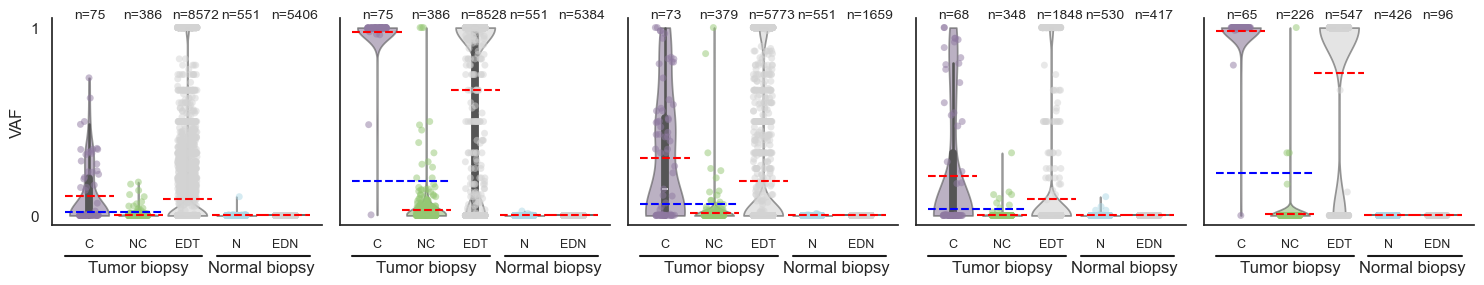

In [71]:
sns.set_theme(style="white",font_scale=1)
#muts =['chrM:2815:A','chrM:3092:C','chrM:5179:C','chrM:13635:C','chrM:16192:T']
muts =['chrM:2815','chrM:3092','chrM:5179','chrM:13635','chrM:16192']
df = pd.read_csv('c:/Users/arthu/These/Documents/Projects/long_reads_tree/REVISIONS/MitoConta/P1.scRNA_VAF.tsv',sep='\t')
df['Barcodes'] = 'T_' + df['Barcodes'].astype(str)


df1 = pd.read_csv('c:/Users/arthu/These/Documents/Projects/long_reads_tree/REVISIONS/MitoConta/P1.scRNA_VAF.emptydrops.tsv',sep='\t')
df1['Barcodes'] = 'EDT_' + df1['Barcodes'].astype(str)
df2 = pd.read_csv('c:/Users/arthu/These/Documents/Projects/long_reads_tree/REVISIONS/MitoConta/P1.scRNA_VAF.Norm.tsv',sep='\t')
df2['Barcodes'] = 'NT_' + df2['Barcodes'].astype(str)
df3 = pd.read_csv('c:/Users/arthu/These/Documents/Projects/long_reads_tree/REVISIONS/MitoConta/P1.scRNA_VAF.Norm.emptydrops.tsv',sep='\t')
df3['Barcodes'] = 'EDN_' + df3['Barcodes'].astype(str)
df = pd.concat([df,df1,df2,df3])

df['CellType'] = df['CellType'].map({'Cancer':'C',
                                     'NonCancer':'NC',
                                     'Normal':'N',
                                     "Empty droplets\r\n Tumor":'EDT',
                                     "Empty droplets\r\n Normal":'EDN'})
df['Seq.'] = 'scRNA'


df['SNV'] = [i[:-2] for i in list(df['SNV'])]
df['SNV'] = pd.Categorical(df['SNV'],muts)
df['CellType'] = pd.Categorical(df['CellType'],['C','NC','EDT','N','EDN'])
df = df.sort_values(['SNV','CellType'])

palette =['#8F79A1','#94C773','lightgrey','lightblue','lightgrey']

def splot(x,y,**kwargs):
    sns.stripplot(x=x, y=y, palette = palette, alpha =.5,
                 dodge=False,jitter = 0.2, legend=False)

def vplot(x,y,**kwargs):
    sns.violinplot(x=x, y=y, palette=palette,
               alpha =.6, scale="width",cut=0)
   
g = sns.FacetGrid(df,col='SNV',row = 'Seq.',sharex=False,margin_titles=True)#,height=5, aspect = 1)
g.map(vplot,'CellType', 'VAF')
g.map(splot,'CellType', 'VAF')

for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(),size = 9)

#Suptitles
[plt.setp(ax.texts, text="") for ax in g.axes.flat] # remove the original texts
g.set_titles(row_template = '', col_template = '',size=12)
g.set_axis_labels("", "VAF")
#plt.rcParams["axes.labelsize"] = 14
g.set(yticks=[0,1])

cell_count = {}
for mut in muts:
     cell_count[mut] = Counter(df[df['SNV']==mut]['CellType'])

mean_vaf = {mut:{} for mut in muts}
ratio_edt_biopsy = {}[]
for mut in muts:
    for ctype in ['C','NC','EDT','N','EDN']:
        df1 = df[df['SNV']==mut]
        m = np.mean(df1[df1['CellType'] == ctype]['VAF'])
        mean_vaf[mut][ctype] = m
        #print(mut,ctype,m)
    mean_vaf[mut]['biopsy'] = np.mean(df1[df1['CellType'].isin(['C','NC'])]['VAF'])
    ratio_edt_biopsy.append(mean_vaf[mut]['EDT']/mean_vaf[mut]['biopsy'])
    
print(ratio_edt_biopsy)
print(np.mean(ratio_edt_biopsy))

i=0
for ax in g.axes.ravel():
    x=0
    for ctype in ['C','NC','EDT','N','EDN']:
        c = cell_count[muts[i]][ctype]
        m = mean_vaf[muts[i]][ctype]
        ax.annotate('n={:.0f}'.format(c), xy=(-0.3+x, 1.05),size=10)
        ax.hlines(y=m, xmin=-0.5+x, xmax=0.5+x, color='red', linestyle='--', linewidth=1.5, zorder=10000)
        x+=1
    ax.hlines(y=mean_vaf[muts[i]]['biopsy'], xmin=-0.5, xmax=1.5, color='blue', linestyle='--', linewidth=1.5, zorder=10000)
    i+=1


for ax in g.axes.ravel():
    trans = ax.get_xaxis_transform()

    ax.plot([-.5,2.3],[-.15,-.15], color="k", transform=trans, clip_on=False)
    ax.annotate('Tumor biopsy', xy=(1, -.17), xycoords=trans, ha="center", va="top")
    
    ax.plot([2.6,4.5],[-.15,-.15], color="k", transform=trans, clip_on=False)
    ax.annotate('Normal biopsy', xy=(3.5, -.17), xycoords=trans, ha="center", va="top")


plt.tight_layout()
plt.savefig('c:/Users/arthu/These/Documents//Projects/long_reads_tree/REVISIONS/MitoConta/P1.emptydrops.png',
            dpi=600)



                  Barcodes CellType  ALT  VAF         SNV   Seq.
0       T_AACAAAGCACACAGCC        C   16  1.0  chrM:16065  scRNA
1       T_AACAAGACAACCAATC        C    1  1.0  chrM:16065  scRNA
2       T_AACAAGACACAAATAG       NC    0  0.0  chrM:16065  scRNA
3       T_AACCATGTCTTAGCCC       NC    0  0.0  chrM:16065  scRNA
4       T_AACCTTTTCGTGGACC        C   33  1.0  chrM:16065  scRNA
...                    ...      ...  ...  ...         ...    ...
2947  EDT_AATAGGATGCGTATTG      EDT    1  1.0  chrM:16065  scRNA
2948  EDT_CTATGGCCTACTGAGG      EDT    1  1.0  chrM:16065  scRNA
2949  EDT_TATCAGCGACGTGGAA      EDT    2  1.0  chrM:16065  scRNA
2950  EDT_ATCACAGACGTAATGA      EDT    0  0.0  chrM:16065  scRNA
2951  EDT_CGATCTCACTACCTAG      EDT    0  0.0  chrM:16065  scRNA

[3600 rows x 6 columns]
                  Barcodes CellType  ALT     VAF         SNV   Seq.
279     T_AACAAAGCACACAGCC        C  120  0.9677   chrM:2573  scRNA
280     T_AACAAGACAACCAATC        C   32  0.4638   chrM:257

C:\Users\arthu\AppData\Local\Temp\ipykernel_4432\638023276.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=x, y=y, palette=palette,
C:\Users\arthu\AppData\Local\Temp\ipykernel_4432\638023276.py:32: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x=x, y=y, palette=palette,
C:\Users\arthu\AppData\Local\Temp\ipykernel_4432\638023276.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=x, y=y, palette=palette,
C:\Users\arthu\AppData\Local\Temp\ipykernel_4432\638023276.py:32: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density

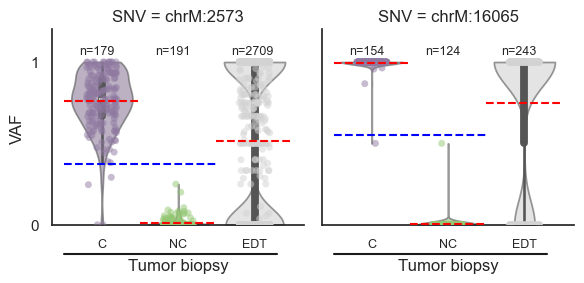

In [175]:
sns.set_theme(style="white",font_scale=1)
#muts =['chrM:2815:A','chrM:3092:C','chrM:5179:C','chrM:13635:C','chrM:16192:T']
muts =['chrM:2573','chrM:16065']
df = pd.read_csv('c:/Users/arthu/These/Documents/Projects/long_reads_tree/REVISIONS/MitoConta/P2.scRNA_VAF.tsv',sep='\t')
df['Barcodes'] = 'T_' + df['Barcodes'].astype(str)


df1 = pd.read_csv('c:/Users/arthu/These/Documents/Projects/long_reads_tree/REVISIONS/MitoConta/P2.scRNA_VAF.emptydrops.tsv',sep='\t')
df1['Barcodes'] = 'EDT_' + df1['Barcodes'].astype(str)

df = pd.concat([df,df1])

df['CellType'] = df['CellType'].map({'Cancer':'C',
                                     'NonCancer':'NC',
                                     "Empty droplets\r\n Tumor":'EDT'})
df['Seq.'] = 'scRNA'


df['SNV'] = [i[:-2] for i in list(df['SNV'])]
df['SNV'] = pd.Categorical(df['SNV'],muts)
df['CellType'] = pd.Categorical(df['CellType'],['C','NC','EDT'])
print(df) 
df = df.sort_values(['SNV','CellType'])

palette =['#8F79A1','#94C773','lightgrey']

def splot(x,y,**kwargs):
    sns.stripplot(x=x, y=y, palette = palette, alpha =.5,
                 dodge=False,jitter = 0.2, legend=False)

def vplot(x,y,**kwargs):
    sns.violinplot(x=x, y=y, palette=palette,
               alpha =.6, scale="width",cut=0)
print(df)
   
g = sns.FacetGrid(df,col='SNV',row = 'Seq.',sharex=False,margin_titles=True)#,height=5, aspect = 1)
g.map(vplot,'CellType', 'VAF')
g.map(splot,'CellType', 'VAF')

for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(),size = 9)

#Suptitles
[plt.setp(ax.texts, text="") for ax in g.axes.flat] # remove the original texts
#g.set_titles(row_template = '', col_template = '',size=12)
g.set_axis_labels("", "VAF")
#plt.rcParams["axes.labelsize"] = 14
g.set(yticks=[0,1])
g.set(ylim=(0, 1.2))
cell_count = {}
for mut in muts:
     cell_count[mut] = Counter(df[df['SNV']==mut]['CellType'])

mean_vaf = {mut:{} for mut in muts}
for mut in muts:
    for ctype in ['C','NC','EDT']:
        df1 = df[df['SNV']==mut]
        m = np.mean(df1[df1['CellType'] == ctype]['VAF'])
        mean_vaf[mut][ctype] = m
    mean_vaf[mut]['biopsy'] = np.mean(df1[df1['CellType'].isin(['C','NC'])]['VAF'])
    
i=0
for ax in g.axes.ravel():
    x=0
    for ctype in ['C','NC','EDT']:
        c = cell_count[muts[i]][ctype]
        m = mean_vaf[muts[i]][ctype]
        ax.annotate('n={:.0f}'.format(c), xy=(-0.3+x, 1.05),size=9)
        ax.hlines(y=m, xmin=-0.5+x, xmax=0.5+x, color='red', linestyle='--', linewidth=1.5, zorder=10000)
        x+=1
    ax.hlines(y=mean_vaf[muts[i]]['biopsy'], xmin=-0.5, xmax=1.5, color='blue', linestyle='--', linewidth=1.5, zorder=10000)
    i+=1


for ax in g.axes.ravel():
    trans = ax.get_xaxis_transform()

    ax.plot([-.5,2.3],[-.15,-.15], color="k", transform=trans, clip_on=False)
    ax.annotate('Tumor biopsy', xy=(1, -.17), xycoords=trans, ha="center", va="top")
    
    



plt.tight_layout()
plt.savefig('c:/Users/arthu/These/Documents//Projects/long_reads_tree/REVISIONS/MitoConta/P2.emptydrops.test.png',
            dpi=600)



              Barcodes CellType  ALT  VAF         SNV   Seq.
0     AAAGCAACATTGCATG      CC1    0  0.0  chrM:13635  scDNA
1     AAATGCCAGCCCAATT      NCC    0  0.0  chrM:13635  scDNA
2     AACCATGCAGAAGAAG      NCC    0  0.0  chrM:13635  scDNA
3     AACCATGTCCTGCACT      NCC    0  0.0  chrM:13635  scDNA
4     AACCATGTCGTTACCC      NCC    0  0.0  chrM:13635  scDNA
...                ...      ...  ...  ...         ...    ...
1009  TTGACTTTCTGGGCTG      NCC    0  0.0  chrM:16192  scDNA
1010  TTGCGTCCATCCCAAA      CC1   10  1.0  chrM:16192  scDNA
1011  TTGCGTCGTAGGGTGT      CC1    5  1.0  chrM:16192  scDNA
1012  TTTGCGCTCAGTACAC      NCC    0  0.0  chrM:16192  scDNA
1013  TTTGGTTAGATCGGGT      NCC    0  0.0  chrM:16192  scDNA

[1014 rows x 6 columns]
              Barcodes CellType  ALT     VAF         SNV   Seq.
589   AAAGCAACATTGCATG      CC1    0  0.0000   chrM:2815  scDNA
596   ACACTGAAGCTTTCAG      CC1    0  0.0000   chrM:2815  scDNA
599   ACATGGTAGTGATGAT      CC1    0  0.0000   chrM

C:\Users\arthu\AppData\Local\Temp\ipykernel_4432\3850458623.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=x, y=y, palette=palette,
C:\Users\arthu\AppData\Local\Temp\ipykernel_4432\3850458623.py:35: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x=x, y=y, palette=palette,
C:\Users\arthu\AppData\Local\Temp\ipykernel_4432\3850458623.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=x, y=y, palette=palette,
C:\Users\arthu\AppData\Local\Temp\ipykernel_4432\3850458623.py:35: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `den

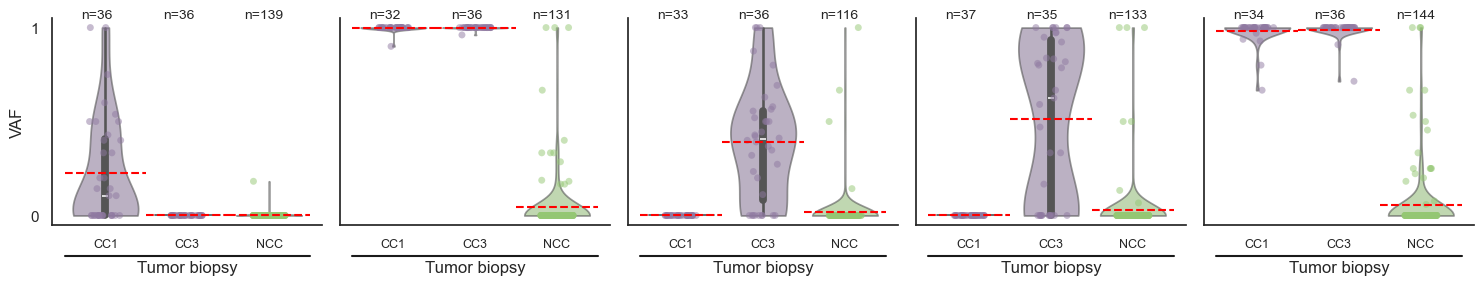

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

sns.set_theme(style="white",font_scale=1)
#muts =['chrM:2815:A','chrM:3092:C','chrM:5179:C','chrM:13635:C','chrM:16192:T']
muts =['chrM:2815','chrM:3092','chrM:5179','chrM:13635','chrM:16192']

df = pd.read_csv('c:/Users/arthu/These/Documents/Projects/long_reads_tree/REVISIONS/MitoConta/P1.scDNA_VAF.tsv',sep='\t')


df['CellType'] = df['CellType'].map({'Clone_Tum_3':'CC3',
                                     'Clone_Tum_1':'CC1',
                                     'Clone_NonTum_0':'NCC',
                                     'Clone_NonTum_2':'NCC'})
df['Seq.'] = 'scDNA'


df['SNV'] = [i[:-2] for i in list(df['SNV'])]
df['SNV'] = pd.Categorical(df['SNV'],muts)
df['CellType'] = pd.Categorical(df['CellType'],['CC1','CC3','NCC'])

df = df.sort_values(['SNV','CellType'])

palette =['#8F79A1','#8F79A1','#94C773']

def splot(x,y,**kwargs):
    sns.stripplot(x=x, y=y, palette = palette, alpha =.5,
                 dodge=False,jitter = 0.2, legend=False)

def vplot(x,y,**kwargs):
    sns.violinplot(x=x, y=y, palette=palette,
               alpha =.6, scale="width",cut=0)

g = sns.FacetGrid(df,col='SNV',row = 'Seq.',sharex=False,margin_titles=True)#,height=1.5, aspect = 0.86)
g.map(vplot,'CellType', 'VAF')
g.map(splot,'CellType', 'VAF')

for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(),size = 9)

#Suptitles
[plt.setp(ax.texts, text="") for ax in g.axes.flat] # remove the original texts
g.set_titles(row_template = '', col_template = '',size=12)
g.set_axis_labels("", "VAF")
#plt.rcParams["axes.labelsize"] = 14
g.set(yticks=[0,1])

cell_count = {}
for mut in muts:
     cell_count[mut] = Counter(df[df['SNV']==mut]['CellType'])

mean_vaf = {mut:{} for mut in muts}
for mut in muts:
    for ctype in ['CC1','CC3','NCC']:
        df1 = df[df['SNV']==mut]
        m = np.mean(df1[df1['CellType'] == ctype]['VAF'])
        mean_vaf[mut][ctype] = m
    
i=0
for ax in g.axes.ravel():
    x=0
    for ctype in ['CC1','CC3','NCC']:
        c = cell_count[muts[i]][ctype]
        m = mean_vaf[muts[i]][ctype]
        ax.annotate('n={:.0f}'.format(c), xy=(-0.3+x, 1.05),size=10)
        ax.hlines(y=m, xmin=-0.5+x, xmax=0.5+x, color='red', linestyle='--', linewidth=1.5, zorder=10000)
        x+=1
    i+=1


for ax in g.axes.ravel():
    trans = ax.get_xaxis_transform()

    ax.plot([-.5,2.5],[-.15,-.15], color="k", transform=trans, clip_on=False)
    ax.annotate('Tumor biopsy', xy=(1, -.17), xycoords=trans, ha="center", va="top")


plt.tight_layout()
plt.savefig('c:/Users/arthu/These/Documents//Projects/long_reads_tree/REVISIONS/MitoConta/P1.scDNA.png',
           dpi=600)



             Barcodes CellType  ALT  VAF         SNV   Seq.
0    AAACGGGTCGGATGCC      CC1   40  1.0  chrM:16065  scDNA
1    AACACGTTCCACTCGT      CC1   30  1.0  chrM:16065  scDNA
2    AACTCAGGTCGCGTCA      CC1    2  1.0  chrM:16065  scDNA
3    AACTGGTAGTTCGCAT      CC1   35  1.0  chrM:16065  scDNA
4    AACTGGTGTATCGCCG      CC1   16  1.0  chrM:16065  scDNA
..                ...      ...  ...  ...         ...    ...
338  TTCTACAAGTACGACG      NCC    0  0.0   chrM:2573  scDNA
339  TTCTACAGTGGTAACG      NCC    0  0.0   chrM:2573  scDNA
340  TTGCCGTTCATATCTC      NCC    0  0.0   chrM:2573  scDNA
341  TTGGCAACACAAGCTT      NCC    0  0.0   chrM:2573  scDNA
342  TTTGTCATCACGGTAT      NCC    0  0.0   chrM:2573  scDNA

[343 rows x 6 columns]
             Barcodes CellType  ALT     VAF         SNV   Seq.
173  AAACGGGTCGGATGCC      CC1   31  0.6889   chrM:2573  scDNA
174  AACACGTTCCACTCGT      CC1   19  0.5938   chrM:2573  scDNA
175  AACTCAGGTCGCGTCA      CC1    3  1.0000   chrM:2573  scDNA
176 

C:\Users\arthu\AppData\Local\Temp\ipykernel_4432\1855718127.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=x, y=y, palette=palette,
C:\Users\arthu\AppData\Local\Temp\ipykernel_4432\1855718127.py:33: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x=x, y=y, palette=palette,
C:\Users\arthu\AppData\Local\Temp\ipykernel_4432\1855718127.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=x, y=y, palette=palette,
C:\Users\arthu\AppData\Local\Temp\ipykernel_4432\1855718127.py:33: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `den

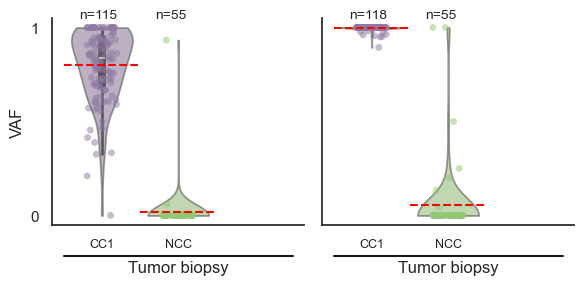

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

sns.set_theme(style="white",font_scale=1)
muts = ['chrM:2573','chrM:16065']

df = pd.read_csv('c:/Users/arthu/These/Documents/Projects/long_reads_tree/REVISIONS/MitoConta/P2.scDNA_VAF.tsv',sep='\t')


df['CellType'] = df['CellType'].map({
                                     'Clone_Tum_1':'CC1',
                                     'Clone_NonTum_1':'NCC'})
df['Seq.'] = 'scDNA'


df['SNV'] = [i[:-2] for i in list(df['SNV'])]
df['SNV'] = pd.Categorical(df['SNV'],muts)
df['CellType'] = pd.Categorical(df['CellType'],['CC1','NCC'])

df = df.sort_values(['SNV','CellType'])

palette =['#8F79A1','#94C773']

def splot(x,y,**kwargs):
    sns.stripplot(x=x, y=y, palette = palette, alpha =.5,
                 dodge=False,jitter = 0.2, legend=False)

def vplot(x,y,**kwargs):
    sns.violinplot(x=x, y=y, palette=palette,
               alpha =.6, scale="width",cut=0)
   
g = sns.FacetGrid(df,col='SNV',row = 'Seq.',sharex=False,margin_titles=True)#,height=1.5, aspect = 0.86)
g.map(vplot,'CellType', 'VAF')
g.map(splot,'CellType', 'VAF')

for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(),size = 9)

#Suptitles
[plt.setp(ax.texts, text="") for ax in g.axes.flat] # remove the original texts
g.set_titles(row_template = '', col_template = '',size=12)
g.set_axis_labels("", "VAF")
#plt.rcParams["axes.labelsize"] = 14
g.set(yticks=[0,1])

cell_count = {}
for mut in muts:
     cell_count[mut] = Counter(df[df['SNV']==mut]['CellType'])

mean_vaf = {mut:{} for mut in muts}
for mut in muts:
    for ctype in ['CC1','NCC']:
        df1 = df[df['SNV']==mut]
        m = np.mean(df1[df1['CellType'] == ctype]['VAF'])
        mean_vaf[mut][ctype] = m
    
i=0
for ax in g.axes.ravel():
    x=0
    for ctype in ['CC1','NCC']:
        c = cell_count[muts[i]][ctype]
        m = mean_vaf[muts[i]][ctype]
        ax.annotate('n={:.0f}'.format(c), xy=(-0.3+x, 1.05),size=10)
        ax.hlines(y=m, xmin=-0.5+x, xmax=0.5+x, color='red', linestyle='--', linewidth=1.5, zorder=10000)
        x+=1
    i+=1


for ax in g.axes.ravel():
    trans = ax.get_xaxis_transform()

    ax.plot([-.5,2.5],[-.15,-.15], color="k", transform=trans, clip_on=False)
    ax.annotate('Tumor biopsy', xy=(1, -.17), xycoords=trans, ha="center", va="top")


plt.tight_layout()
plt.savefig('c:/Users/arthu/These/Documents//Projects/long_reads_tree/REVISIONS/MitoConta/P2.scDNA.png',
           dpi=600)

